In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
sns.set_style("white")
sns.set_style("ticks")

In [3]:
ReachData = np.load('ReachData.npz', allow_pickle=True)

print(ReachData.files)

### to find out the fields of a Python structure/dictionary, the command "dir" is useful
print(dir(ReachData))

['r', 'numUnits', 'cfr', 'dataset', 'classes', 'cInds', 'NC', 'targets', 'NumberInClass', 'RT', 'numTrials', 'pp']
['__abstractmethods__', '__class__', '__class_getitem__', '__contains__', '__del__', '__delattr__', '__dict__', '__dir__', '__doc__', '__enter__', '__eq__', '__exit__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__reversed__', '__setattr__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_files', 'allow_pickle', 'close', 'f', 'fid', 'files', 'get', 'items', 'iteritems', 'iterkeys', 'keys', 'pickle_kwargs', 'values', 'zip']


In [4]:
r = ReachData['r']

spike_times = [] # This will be a list across trials of a list across units of np arrays of spike times 
time_touch_held = []
time_go_cue = []
time_target_acquired = []
for trial in r:
    spike_times.append([u.spikeTimes if type(u.spikeTimes) is np.ndarray \
                           else np.array([u.spikeTimes]) for u in trial.unit])
    time_touch_held.append(trial.timeTouchHeld)
    time_go_cue.append(trial.timeGoCue)
    time_target_acquired.append(trial.timeTargetAcquire)

time_touch_held = np.array(time_touch_held)
time_go_cue = np.array(time_go_cue)
time_target_acquired = np.array(time_target_acquired)

In [5]:
directions = ReachData['targets']

In [6]:
directions

array([[-98, -17],
       [-86,  50],
       [-64, -76],
       [-34,  93],
       [ 34,  93],
       [ 64, -76],
       [ 86,  50],
       [ 98, -17]], dtype=int16)

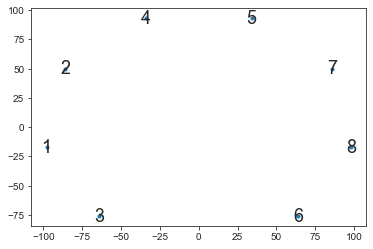

In [7]:
fig, ax = plt.subplots(1, 1)
ax.plot(directions[:,0], directions[:,1],'.')
for c, d in enumerate(directions):
    plt.text(directions[c,0], directions[c,1], '{}'.format(c+1),horizontalalignment='center',
         verticalalignment='center', fontsize=18)

In [8]:
cfr = ReachData['cfr']

In [9]:
len(cfr)

1127

In [10]:
np.unique(cfr)

array([1, 2, 3, 4, 5, 6, 7, 8], dtype=uint8)

In [11]:
first_trial = r[0]
#dir(first_trial.TrialParams)

In [12]:
r[0].TrialParams.target1X, r[0].TrialParams.target1Y

(-34, 93)

In [13]:
cfr[0]

4

In [14]:
# first: turn directions into unit vectors:
unit_angles = np.arctan2(directions[:,0], directions[:,1])

sort_inds = np.argsort(unit_angles)
# unit_angles = unit_angles[sorted_classes]/np.pi * 180
unit_angles = unit_angles[sort_inds]/np.pi * 180
sorted_classes = np.linspace(1,8,8, dtype=int)[sort_inds]
new_class_lookup = np.argsort(sort_inds)

target_locations = directions[sort_inds,:]

In [15]:
cfr[:20]

array([4, 1, 7, 5, 6, 8, 8, 4, 7, 1, 1, 5, 7, 2, 3, 8, 7, 4, 2, 5],
      dtype=uint8)

In [16]:
trial_reach_target = new_class_lookup[cfr-1]

In [17]:
trial_reach_target[:20]

array([3, 1, 5, 4, 7, 6, 6, 3, 5, 1, 1, 4, 5, 2, 0, 6, 5, 3, 2, 4])

In [18]:
unit_angles

array([-139.8991  ,  -99.84113 ,  -59.826477,  -20.081976,   20.081976,
         59.826477,   99.84113 ,  139.8991  ], dtype=float32)

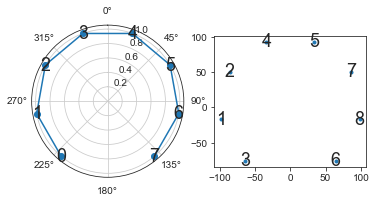

In [19]:
fig, ax = plt.subplots(1, 2, subplot_kw={'projection': 'polar'})
ax[0].plot(unit_angles/180*np.pi, np.ones(8),'o-')
ax[0].set_theta_zero_location('N')
ax[0].set_theta_direction(-1)  # theta increasing clockwise
for c, th in enumerate(unit_angles):
    ax[0].text(th/180*np.pi, 1, '{}'.format(c),horizontalalignment='center',
         verticalalignment='center', fontsize=18)
    
ax[1].remove()
ax2 = fig.add_subplot(1,2,2)
ax2.plot(directions[:,0], directions[:,1],'.')
ax2.set_aspect('equal')
for c, d in enumerate(directions):
    ax2.text(directions[c,0], directions[c,1], '{}'.format(c+1),horizontalalignment='center',
         verticalalignment='center', fontsize=18)

In [51]:

with open('homework4_metadata.npy', 'wb') as datafile:
    np.savez(datafile, time_touch_held=time_touch_held,
                time_go_cue=time_go_cue,
                time_target_acquired=time_target_acquired,
                trial_reach_target=trial_reach_target,
                target_locations=target_locations,
                target_angles=unit_angles)

In [40]:
spike_times[-1][0]

array([1050.16458333, 1079.92604167])

In [52]:
spike_times_shrunk = []
for trial in spike_times:
    spike_times_shrunk.append([])

    for sp in trial:
        spike_times_shrunk[-1].append(np.asarray(sp,dtype=np.float32))

In [53]:
# with open('homework4_spikes.npz', 'wb') as datafile:
#     np.savez_compressed(datafile, spike_times=spike_times)
# float64 raw data is 28M    

with open('homework4_spikes.npz', 'wb') as datafile:
    np.savez_compressed(datafile, spike_times=spike_times_shrunk)
# float 32 data is 19M  